In [1]:
# #installing keras-tuner
# !pip install keras-tuner


In [2]:
#importing necessary liabraries
import tensorflow as tf
import keras_tuner
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#loading dataset and spliting it in test and train dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#check x_train shape
x_train.shape


(60000, 28, 28)

In [5]:
#setting the y_train data
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

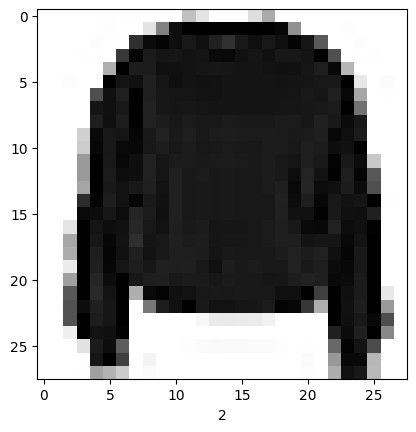

In [6]:
#checking a random element 7 and visualizing it
plt.imshow(x_train[7],cmap='binary')
plt.xlabel(y_train[7])
plt.show()

In [9]:
#creating model for the tuner

def create_model(hp):
  num_hidden_layers = 1  # hidden layer
  num_units = 8
  dropout_rate = 0.1  # dropout rate
  learning_rate = 0.01  # learning rate

  if hp:  # creating a hyperparameter with choices
    num_hidden_layers = hp.Choice('num_hidden_layers', values=[1, 2, 3])
    num_units = hp.Choice('num_units', values=[8, 16, 32])
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5)
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01)

  model = tf.keras.models.Sequential()  # creating a sequential model

  # First CONV => RELU => CONV => RELU => POOL layer set
  model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1)))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same"))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  # Second CONV => RELU => CONV => RELU => POOL layer set
  model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same"))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same"))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same"))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same"))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.BatchNormalization(axis=3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  # First (and only) set of FC => RELU layers
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512))
  model.add(tf.keras.layers.Activation("relu"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.5))

  # Softmax classifier
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation("softmax"))

  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
  )
  return model

In [10]:
def preprocess_data(images, targets, use_augmentation=False, nb_of_augmentation=1):
    """
    images: raw image
    targets: target label
    use_augmentation: True if augmentation should be used
    nb_of_augmentation: If use_augmentation=True, number of augmentations
    """
    print("Augmenting images...")
    X = []
    y = []
    for x_, y_ in zip(images, targets):
        
        # scaling pixels between 0.0-1.0
        x_ = x_ / 255.0
        x_ = x_.reshape(28, 28, 1)  # reshape to include the channel dimension
        # data Augmentation
        if use_augmentation:
            argu_img = image_augmentation(x_, nb_of_augmentation)
            for a in argu_img:
                reshaped_a = a.reshape(28, 28, 1)
                X.append(reshaped_a)
                y.append(y_)
                
        X.append(x_)
        y.append(y_)
    print('*Preprocessing completed: %i samples\n' % len(X))
    return np.array(X), tf.keras.utils.to_categorical(y)

# Example usage
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

Augmenting images...
*Preprocessing completed: 60000 samples

Augmenting images...
*Preprocessing completed: 10000 samples



In [ ]:
#creating model summary
# create_model(None).summary()

In [ ]:
# #defining a class with custom tuner using bayesian optimzation
# class CustomTuner(keras_tuner.tuners.BayesianOptimization):
#   def run_trial(self,trial, *args, **kwargs):
#     kwargs['batch_size']=trial.hyperparameters.Int('batch_size',32,128,step=32) #giving batch size
#     super(CustomTuner,self).run_trial(trial,*args,**kwargs)
#     return history.history['val_accuracy'][-1]

In [ ]:
# #running a custom tuner
# tuner=CustomTuner(
#     create_model,
#     objective='val_accuracy', #validation accuracy
#     max_trials=20,           #defining max number of trials
#     directory='logs',
#     project_name='fashion_mnist',
#     overwrite=True
# )

In [ ]:
# tuner.search_space_summary()

In [ ]:
# tuner.search(
#     x_train,y_train,
#     validation_data=(x_test,y_test),
#     epochs=5,verbose=False
# )

In [ ]:
# tuner.results_summary(1)

In [ ]:
# model=tuner.get_best_models(num_models=1)[0]
# model.summary()

In [11]:
# Convert y_train and y_test back to sparse format
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)


In [15]:
model =create_model(None)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, min_lr=0.000001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', restore_best_weights=True)

fit = model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=50,batch_size=64,verbose=1,
    callbacks=[reduce_lr]
)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.7472 - loss: 0.7719 - val_accuracy: 0.8704 - val_loss: 0.3626 - learning_rate: 0.0010
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8797 - loss: 0.3328 - val_accuracy: 0.9034 - val_loss: 0.2679 - learning_rate: 0.0010
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9002 - loss: 0.2763 - val_accuracy: 0.9097 - val_loss: 0.2572 - learning_rate: 0.0010
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9080 - loss: 0.2527 - val_accuracy: 0.9066 - val_loss: 0.2622 - learning_rate: 0.0010
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9153 - loss: 0.2283 - val_accuracy: 0.9204 - val_loss: 0.2156 - learning_rate: 0.0010
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9188 - loss: 0.2211 - val_accuracy: 0.9156 - val_loss: 0.2425 - learning_rate: 0.0010
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9244 - loss: 0.2089 

In [18]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9436 - loss: 0.2078


[0.200734943151474, 0.9437999725341797]

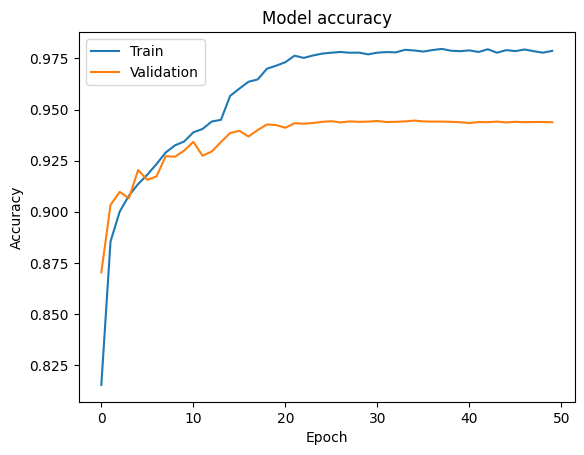

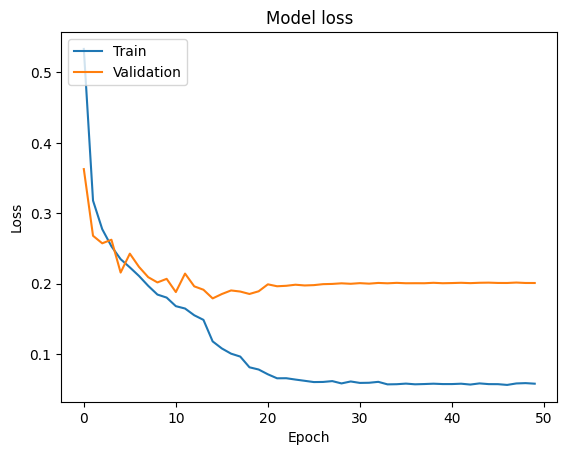

In [19]:
# Plotting training & validation accuracy values
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Creating model for the tuner
def create_model(hp):
    num_units = 8
    dropout_rate = 0.1
    learning_rate = 0.01

    if hp:
        num_units = hp.Choice('num_units', values=[8, 16, 32])
        dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5)
        learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01)

    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_units, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model

# Assuming x_train and x_test are your training and testing data
# Resize the input data to (75, 75, 3)
x_train_resized = tf.image.resize(x_train, (75, 75))
x_test_resized = tf.image.resize(x_test, (75, 75))

# Convert grayscale images to RGB by duplicating the single channel three times
x_train_rgb = tf.image.grayscale_to_rgb(x_train_resized)
x_test_rgb = tf.image.grayscale_to_rgb(x_test_resized)

# Create the model
model_1 = create_model(None)

# Define callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, min_lr=0.000001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', restore_best_weights=True)

# Fit the model
fit = model_1.fit(
    x_train_rgb, y_train,
    validation_data=(x_test_rgb, y_test),
    epochs=50, batch_size=64, verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
